In [32]:
# Linear Regression + Feature Selection

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:] #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [24]:
#import model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

# define new class for pipeline that passes feature importance or coef to RFE
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self

lin_pipeline =  PipelineRFE([
                    ('scale', StandardScaler()), 
                    ('lr', LinearRegression())
                     ], verbose=True)

selectionObj = RFECV(lin_pipeline, step=5, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
selectionObj.fit(X_train, y_train)
print("Optimal number of features : %d" % selectionObj.n_features_)

Fitting estimator with 311 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.5s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   3.3s
Fitting estimator with 306 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   3.2s
Fitting estimator with 301 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   3.1s
Fitting estimator with 296 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   3.0s
Fitting estimator with 291 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   2.8s
Fitting estimator with 286 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.

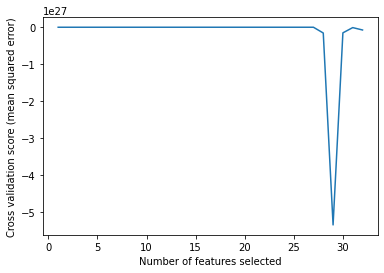

In [23]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean squared error)")
plt.plot(range(1, len(selectionObj.grid_scores_) + 1), selectionObj.grid_scores_)
plt.show()

In [34]:
#check features
selected_features = X_train.columns[selectionObj.support_]
print(selected_features)

Index(['fuelType_andere'], dtype='object')
